# Head

In [1]:
import pandas as pd

test = pd.read_csv('/home/lyuzhuoqi/projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
deepseek_v3 = pd.read_csv('/home/lyuzhuoqi/projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/deepseek_v3.txt', 
                          sep='\t', header=None, names=['deepseek_v3'])
gemma3 = pd.read_csv('/home/lyuzhuoqi/projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/gemma3_TLDR.txt',
                          sep='\t', header=None, names=['gemma3'])
llama4 = pd.read_csv('/home/lyuzhuoqi/projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/llama4_TLDR.txt',
                          sep='\t', header=None, names=['llama4'])
qwq = pd.read_csv('/home/lyuzhuoqi/projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/qwq_TLDR.txt',
                          sep='\t', header=None, names=['qwq'])
df = test.join([deepseek_v3, gemma3, llama4, qwq])

for index in pd.read_csv("/home/lyuzhuoqi/projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

,abs_doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...
...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...


In [2]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
import pickle
print("Loading doi_mag_pid_dict...")
with open("/home/lyuzhuoqi/projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['abs_doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].parallel_apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,abs_doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,mag_pid
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895
...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...,2943378944


In [4]:
MAG_paper_df = pd.read_parquet('/home/lyuzhuoqi/projects/TLDR/data/MAG_paper.parquet')
display(MAG_paper_df)
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,Year,DocType,VenueID
PaperID,,,
3206416479,1800,Journal,2360835
3205676634,1800,Journal,148921865
3092044961,1800,Journal,3006142753
3092547797,1800,Journal,3006142753
2895498877,1800,Journal,118082279
...,...,...,...
3212273925,2022,Journal,44455300
3175031963,2022,Journal,2764413287
3198241111,2022,Journal,67716761


,abs_doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,mag_pid,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,3880285,1994
...,...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,129060628,2009
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,3880285,2018
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788,3880285,2016
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...,2943378944,125754415,2019


In [5]:
label_df = pd.read_parquet('/home/lyuzhuoqi/projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [6]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,abs_doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,mag_pid,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,2005395185,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,2082900742,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,2045457895,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,2137227986,129060628,2009,17,Medicine
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,2789780246,3880285,2018,8,Multidisciplinary
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,2266478788,3880285,2016,8,Multidisciplinary
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...,2943378944,125754415,2019,17,Multidisciplinary


In [7]:
df['p2v_label'].value_counts()

p2v_label
17    18439
8      9625
6      1457
7      1028
4       627
9       611
11      580
22      404
18      363
21      319
12      292
20      121
1        60
3        49
14       32
5        25
24       21
16       21
15       17
23       16
2        16
0        10
19        6
13        5
25        2
Name: count, dtype: int64

In [8]:
df['scopus_label'].value_counts()

scopus_label
Multidisciplinary                               15639
Medicine                                         5262
Immunology and Microbiology                      4146
Biochemistry, Genetics and Molecular Biology     4116
Chemistry                                        1285
Neuroscience                                     1211
Agricultural and Biological Sciences              704
Social Sciences                                   608
Earth and Planetary Sciences                      235
Materials Science                                 179
Psychology                                        156
Physics and Astronomy                             139
Pharmacology, Toxicology and Pharmaceutics        128
Environmental Science                             119
Energy                                             39
Mathematics                                        30
Engineering                                        28
Computer Science                                   24
Nursing        

# Predict subject

## 10-fold cv

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    clf = MultinomialNB()
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
    res = {
        'feature': feat,
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'precision_mean': scores['test_precision'].mean(),
        'precision_std': scores['test_precision'].std(),
        'recall_mean': scores['test_recall'].mean(),
        'recall_std': scores['test_recall'].std(),
        'f1_mean': scores['test_f1'].mean(),
        'f1_std': scores['test_f1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Acc: {res['accuracy_mean']:.4f}±{res['accuracy_std']:.4f} | "
        f"Precision: {res['precision_mean']:.4f}±{res['precision_std']:.4f} | "
        f"Recall: {res['recall_mean']:.4f}±{res['recall_std']:.4f} | "
        f"F1: {res['f1_mean']:.4f}±{res['f1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:01<00:00, 21897.80it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    3.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Feature: abstract | Acc: 0.6962±0.0039 | Precision: 0.6544±0.0022 | Recall: 0.9270±0.0074 | F1: 0.7672±0.0035
Processing feature: annotation


Vectorizing documents: 100%|██████████████████████████████████████████| 34146/34146 [00:00<00:00, 135506.62it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Feature: annotation | Acc: 0.6411±0.0043 | Precision: 0.6133±0.0028 | Recall: 0.9076±0.0078 | F1: 0.7320±0.0036
Processing feature: deepseek_v3


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 77566.96it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Feature: deepseek_v3 | Acc: 0.6624±0.0043 | Precision: 0.6311±0.0031 | Recall: 0.9023±0.0053 | F1: 0.7427±0.0033
Processing feature: gemma3


Vectorizing documents: 100%|██████████████████████████████████████████| 34146/34146 [00:00<00:00, 116981.79it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: gemma3 | Acc: 0.6623±0.0048 | Precision: 0.6313±0.0031 | Recall: 0.9008±0.0059 | F1: 0.7423±0.0038
Processing feature: llama4


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 61770.57it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: llama4 | Acc: 0.6486±0.0048 | Precision: 0.6202±0.0033 | Recall: 0.9010±0.0069 | F1: 0.7347±0.0037
Processing feature: qwq


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 44776.26it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: qwq | Acc: 0.6648±0.0046 | Precision: 0.6342±0.0034 | Recall: 0.8961±0.0052 | F1: 0.7428±0.0033


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,abstract,0.696246,0.003894,0.654427,0.002232,0.927002,0.007353,0.767215,0.003539
1,annotation,0.641100,0.004256,0.613316,0.002769,0.907641,0.007798,0.731988,0.003620
2,deepseek_v3,0.662391,0.004315,0.631082,0.003056,0.902272,0.005305,0.742689,0.003252
3,gemma3,0.662333,0.004801,0.631307,0.003140,0.900754,0.005926,0.742332,0.003800
4,llama4,0.648627,0.004779,0.620244,0.003254,0.900970,0.006872,0.734694,0.003712
5,qwq,0.664822,0.004560,0.634235,0.003418,0.896144,0.005219,0.742769,0.003291


## no cv

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
# 二分类标签：是否为17
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42, stratify=y
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    res = {
        'feature': feat,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['accuracy']:.4f} | "
        f"Precision: {res['precision']:.4f} | "
        f"Recall: {res['recall']:.4f} | "
        f"F1: {res['f1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 21465.83it/s]


Feature: abstract | Accuracy: 0.6972 | Precision: 0.6540 | Recall: 0.9328 | F1: 0.7689
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 137783.39it/s]


Feature: annotation | Accuracy: 0.6442 | Precision: 0.6150 | Recall: 0.9121 | F1: 0.7347
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 73381.46it/s]


Feature: deepseek_v3 | Accuracy: 0.6656 | Precision: 0.6333 | Recall: 0.9046 | F1: 0.7450
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 110159.96it/s]


Feature: gemma3 | Accuracy: 0.6723 | Precision: 0.6389 | Recall: 0.9040 | F1: 0.7487
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 84019.43it/s]


Feature: llama4 | Accuracy: 0.6624 | Precision: 0.6299 | Recall: 0.9084 | F1: 0.7439
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44519.71it/s]

Feature: qwq | Accuracy: 0.6685 | Precision: 0.6364 | Recall: 0.9008 | F1: 0.7458


,feature,accuracy,precision,recall,f1
0,abstract,0.697218,0.653992,0.932755,0.768887
1,annotation,0.644217,0.614991,0.912148,0.734658
2,deepseek_v3,0.665593,0.633257,0.904555,0.744975
3,gemma3,0.672328,0.638942,0.904013,0.748709
4,llama4,0.662372,0.629936,0.908351,0.743948
5,qwq,0.668521,0.636398,0.900759,0.745846


# Predict year

In [9]:
df['year'].describe()

count    34146.000000
mean      2006.680724
std          9.105688
min       1887.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

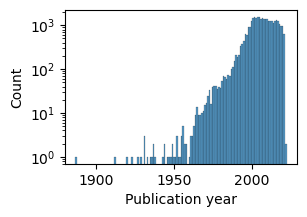

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.histplot(df, x='year', stat='count', discrete=True)
plt.xlabel('Publication year')
plt.yscale('log')
plt.ylabel('Count')
plt.show()

## 10-fold cv

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 指标: MAE, MSE, RMSE, R2
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'RMSE': make_scorer(rmse, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = Ridge(alpha=1.0)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'MAE_mean': -scores['test_MAE'].mean(),  # 取反转为正数
        'MAE_std': scores['test_MAE'].std(),
        'MSE_mean': -scores['test_MSE'].mean(),
        'MSE_std': scores['test_MSE'].std(),
        'R2_mean': scores['test_R2'].mean(),
        'R2_std': scores['test_R2'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE_mean']:.4f}±{res['MAE_std']:.4f} | "
        f"R2: {res['R2_mean']:.4f}±{res['R2_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:01<00:00, 21503.37it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    6.3s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Feature: abstract | MAE: 4.2356±0.0603 | R2: 0.5720±0.0190
Processing feature: annotation


Vectorizing documents: 100%|██████████████████████████████████████████| 34146/34146 [00:00<00:00, 137661.45it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    2.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


Feature: annotation | MAE: 5.6250±0.0732 | R2: 0.2958±0.0114
Processing feature: deepseek_v3


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 75020.81it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


Feature: deepseek_v3 | MAE: 5.0805±0.0757 | R2: 0.4180±0.0188
Processing feature: gemma3


Vectorizing documents: 100%|██████████████████████████████████████████| 34146/34146 [00:00<00:00, 119582.01it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


Feature: gemma3 | MAE: 5.5415±0.0703 | R2: 0.3133±0.0184
Processing feature: llama4


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 61243.52it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


Feature: llama4 | MAE: 5.6321±0.0791 | R2: 0.2965±0.0149
Processing feature: qwq


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 43225.66it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


Feature: qwq | MAE: 5.0561±0.0549 | R2: 0.4138±0.0183


[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


,feature,MAE_mean,MAE_std,MSE_mean,MSE_std,R2_mean,R2_std
0,abstract,4.235631,0.060264,35.484501,2.183844,0.572016,0.019015
1,annotation,5.624965,0.073167,58.375750,2.511118,0.295836,0.011443
2,deepseek_v3,5.080523,0.075717,48.264050,2.687767,0.417952,0.018779
3,gemma3,5.541510,0.070267,56.917301,2.423494,0.313256,0.018379
4,llama4,5.632114,0.079115,58.321946,2.629252,0.296479,0.014943
5,qwq,5.056087,0.054937,48.602374,2.607217,0.413817,0.018308


## no cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)  # 年份作为连续变量回归

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = Ridge(alpha=1.0)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    res = {
        'feature': feat,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE']:.4f} | "
        f"R2: {res['R2']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 22020.20it/s]


Feature: abstract | MAE: 4.2865 | R2: 0.5755
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 130228.28it/s]


Feature: annotation | MAE: 5.5461 | R2: 0.3061
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 77554.96it/s]


Feature: deepseek_v3 | MAE: 5.0521 | R2: 0.4281
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 120217.45it/s]


Feature: gemma3 | MAE: 5.5035 | R2: 0.3244
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 54197.36it/s]


Feature: llama4 | MAE: 5.5231 | R2: 0.3139
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44297.08it/s]


Feature: qwq | MAE: 5.0755 | R2: 0.4131


,feature,MAE,MSE,R2
0,abstract,4.286524,34.042876,0.575475
1,annotation,5.546063,55.646234,0.306074
2,deepseek_v3,5.052078,45.857851,0.428139
3,gemma3,5.503463,54.177417,0.324391
4,llama4,5.523119,55.020432,0.313878
5,qwq,5.075490,47.060866,0.413137
